# Notebook for the fitting Urban scaling laws 

- Repository: [https://github.com/edugalt/scaling](https://github.com/edugalt/scaling)

- Reference: J. C. Leitao, J.M. Miotto, M. Gerlach, and E. G. Altmann, "Is this scaling nonlinear?", Royal Society Open Science 3, 150649 (2016) [DOI: 10.1098/rsos.150649](http://rsos.royalsocietypublishing.org/content/3/7/150649).

- Remove results from folder "_results" to ensure original computations (instead of reading from stored results)

In [5]:
import sys
import numpy as np

sys.path.append("../src/")
sys.path.append("../data/")


import analysis as a
MIN_VALUE = 10**-8

%load_ext autoreload
%autoreload 2

%matplotlib inline
def summary(func):
    print(func.description,'\t Dataset:',func.dataset)
    print('Beta +- error:\t',func.beta)
    print('P-value:\t',func.p_value)
    print('BIC:\t\t',func.bic,'\n')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Choose the dataset 

- by setting the variable dataset="name"

- Pick one of the available datasets (write 'help' as the name of the dataset for a list)

- Or, add your csv dataset to the appropriate folder:

-- New dataset with three columns (name,x,y) = (city-name, population, observable) to folder new_dataset/

-- New dataset with two columns (x,y) = (population, observable) to folder new_dataset2/

In [10]:
dataset="usa_miles"
#Available datasets
#brazil_aids_2010,brazil_gdp_2010,brazil_externalCauses_2010,oecd_gdp,oecd_patents,usa_gdp,usa_miles,eurostat_cinema_seats,eurostat_cinema_attendance,eurostat_museum_visitors,eurostat_theaters,eurostat_libraries,uk_patents,uk_income,uk_train

try:
    x=a.xy(dataset).x
    y=a.xy(dataset).y
except:
    print("Invalid Dataset Chosen. Available datasets are:\n")
    for i in a.DATABASES:
        print(i)

#Deleting all calculations for previously load new datasets
if dataset.startswith("new_dataset"):
    %rm _results/*new_dataset*

# Performing Analysis

 - Each line is one of the models, with specific constrains. Further constrains cna be fixed in each model.
 
 - This can take some time (at least a couple of minutes)

 - Increase the "required_successes=" parameter to increase precision (and computational time) 

## Log-Normal

In [11]:
ln = a.LogNormalAnalysis(dataset, required_successes=2)

In [12]:
ln_beta1=a.LogNormalFixedBetaAnalysis(dataset,required_successes=2)

In [13]:
ln_deltaf=a.LogNormalFixedDAnalysis(dataset,required_successes=2)

##  Gaussian

In [ ]:
Gauss=a.ConstrainedDAnalysis(dataset,required_successes=2)

In [ ]:
Gauss_beta1=a.ConstrainedDFixedBetaAnalysis(dataset,required_successes=2)

## Population

In [ ]:
Pop=a.PopulationAnalysis(dataset,required_successes=2)

In [ ]:
Pop2=a.PopulationFixedGammaAnalysis(dataset,required_successes=2)

## Least Square Fit

In [14]:
LS=a.mls_best_fit(np.log(x),np.log(y))

# Outcome of the Analysis 

### Printing the outcomes

In [ ]:
summary(ln)
summary(ln_beta1)
summary(ln_deltaf)
summary(Gauss)
summary(Gauss_beta1)
summary(Pop)
summary(Pop2)

print("\n Least Square fitting:",LS)

### Plotting data 

NameError: name 'Pop' is not defined

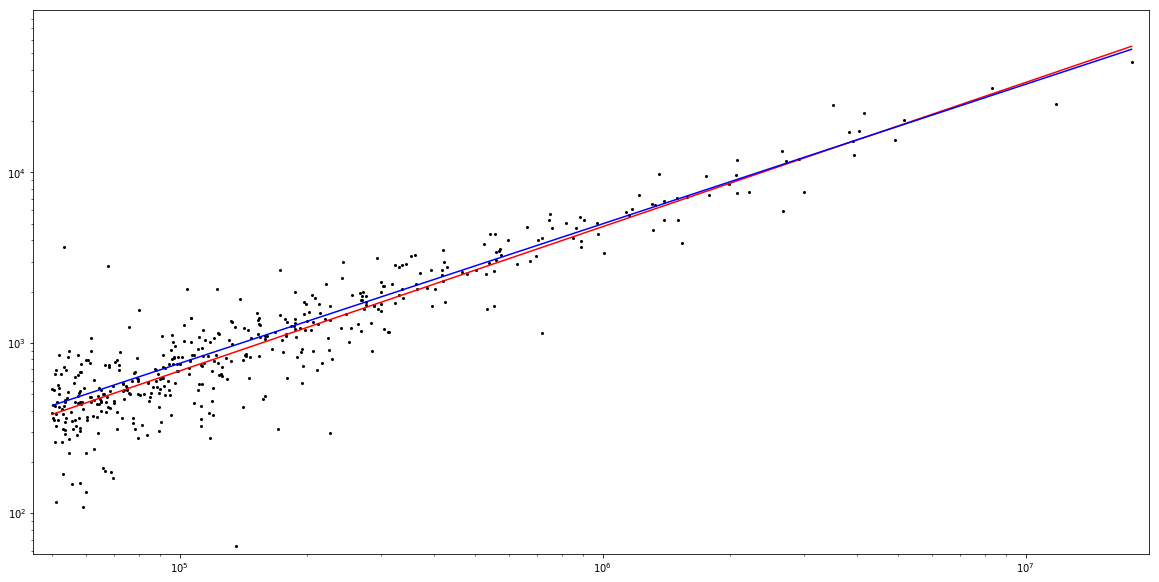

In [15]:
from matplotlib.pyplot import *
figure(figsize=(20,10))
xscale("log")
yscale("log")
xlim(0.9*min(x),1.1*max(x))
ylim(0.9*min(y),2*max(y))
plot(x, y, "o", ms=2,color="black",label="data")
plot(x, np.exp(LS[2])*x**LS[0], "-", ms=2,color="red",label=r"Least Square fit, $\beta=$"+str(LS[0])[:4])
plot(x, ln.params[0]*x**ln.params[1], "-", ms=2,color="blue",label=r"Lognormal Model, $\beta=$"+str(ln.params[1])[:4])
# People's model
Y=np.sum(y)
betaP=Pop.params[0]
Z=np.sum(np.power(x,betaP))
plot(x, Y*x**betaP/Z, "-", ms=2,color="black",label=r"Person's Model, $\beta=$"+str(betaP)[:4])
xlabel("Population")
ylabel("Observable")
legend(loc=0)
show()